## Coursera Capstone

This notebook is for the coursera capstone project

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline  

In [3]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [3]:
df=pd.read_csv("Data_Collisions.csv")
df.head()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.dtypes


SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
#Drop missing values
df.dropna(subset=["WEATHER","ROADCOND","LIGHTCOND"],axis=0,inplace=True) 

<AxesSubplot:xlabel='WEATHER', ylabel='SEVERITYCODE'>

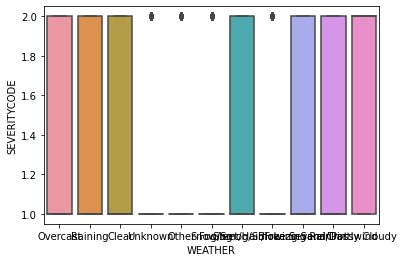

In [6]:
sns.boxplot(x="WEATHER", y="SEVERITYCODE", data=df) 

<AxesSubplot:xlabel='ROADCOND', ylabel='SEVERITYCODE'>

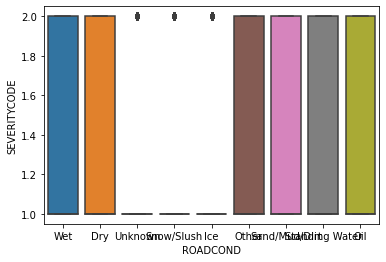

In [7]:
sns.boxplot(x="ROADCOND", y="SEVERITYCODE", data=df)

<AxesSubplot:xlabel='LIGHTCOND', ylabel='SEVERITYCODE'>

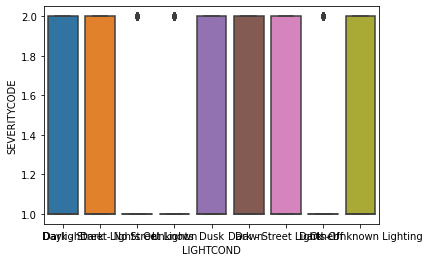

In [8]:
sns.boxplot(x="LIGHTCOND", y="SEVERITYCODE", data=df) 

In [9]:
feature = df[['WEATHER', 'ROADCOND', 'LIGHTCOND']]
y = df['SEVERITYCODE'].values


convert = {'WEATHER': {"Clear": 1, 'Partly Cloudy': 2, 'Overcast': 3,'Other': 0,
                              'Raining':4,'Snowing': 5, 'Fog/Smog/Smoke': 6, 'Sleet/Hail/Freezing Rain': 7,
                              'Blowing Sand/Dirt': 8, 'Severe Crosswind': 9,  'Unknown': 0},
                'ROADCOND': {"Dry": 1, "Wet": 2, "Unknown": 0, "Ice": 3,
                              "Snow/Slush": 4, "Other": 0, "Standing Water": 5,
                              'Sand/Mud/Dirt': 6, 'Oil': 7},
               'LIGHTCOND': {'Daylight': 1, 'Dark - Street Lights On': 4, 'Unknown': 0, 'Dusk': 2, 
                            'Dawn': 3, 'Dark - No Street Lights': 5, 'Dark - Street Lights Off': 6,
                            'Other': 0, 'Dark - Unknown Lighting':7}}

feature.replace(convert, inplace=True)

X = feature
X

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


,WEATHER,ROADCOND,LIGHTCOND
0,3,2,1
1,4,2,4
2,3,1,1
3,1,1,1
4,4,2,1
...,...,...,...
194668,1,1,1
194669,4,2,1
194670,1,1,1
194671,1,1,2


In [10]:
#normalize data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 0.90398664,  1.26765098, -0.56641215],
       [ 1.64139705,  1.26765098,  1.51344106],
       [ 0.90398664, -0.32755591, -0.56641215],
       [-0.57083418, -0.32755591, -0.56641215],
       [ 1.64139705,  1.26765098, -0.56641215]])

In [12]:
#train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (113602, 3) (113602,)
Test set: (75735, 3) (75735,)


In [13]:
#K nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.688796461345481 with k= 8


In [14]:
neigh = KNeighborsClassifier(n_neighbors = 8).fit(X_train,y_train)
neigh


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [15]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#KNN Calculations
yhat_knn = neigh.predict(X_test)

# jaccard
jaccard_knn = jaccard_similarity_score(y_test, yhat_knn)
print("KNN Jaccard index: ", jaccard_knn)

# f1_score
f1_score_knn = f1_score(y_test, yhat_knn, average='weighted')
print("KNN F1-score: ", f1_score_knn)

KNN Jaccard index:  0.688796461345481
KNN F1-score:  0.5882785898661932


In [18]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4) 

Tree 
# it shows the default parameters 

Tree.fit(X_train,y_train) 

#prediction 

yhat_tree = Tree.predict(X_test) 

#evaluation 

# jaccard
jaccard_tree = jaccard_similarity_score(y_test, yhat_tree)
print("Decision tree Jaccard index: ", jaccard_tree)

# f1_score
f1_score_knn = f1_score(y_test, yhat_tree, average='weighted')
print("Decision tree F1-score: ", f1_score_knn)

Decision tree Jaccard index:  0.6993464052287581
Decision tree F1-score:  0.5756158873805932


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [71]:
X1=[[1.0,1.0,1.0]]
X1 = preprocessing.StandardScaler().fit(X1).transform(X1)
y1=neigh.predict(X1)
print(y1)

[1]
